In [7]:
import snowflake_plot as snp
import ice_funcs as icef
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

params = {
    "xtick.top": False, 
    "ytick.right": False,
    "xtick.bottom": False, 
    "ytick.left": False,
    "xtick.direction": "in", 
    "ytick.direction": "in", 
    "figure.dpi": 400
    }
plt.rcParams.update(params)

sns.set_palette("plasma")

# dendrite zone (⌐■_■)

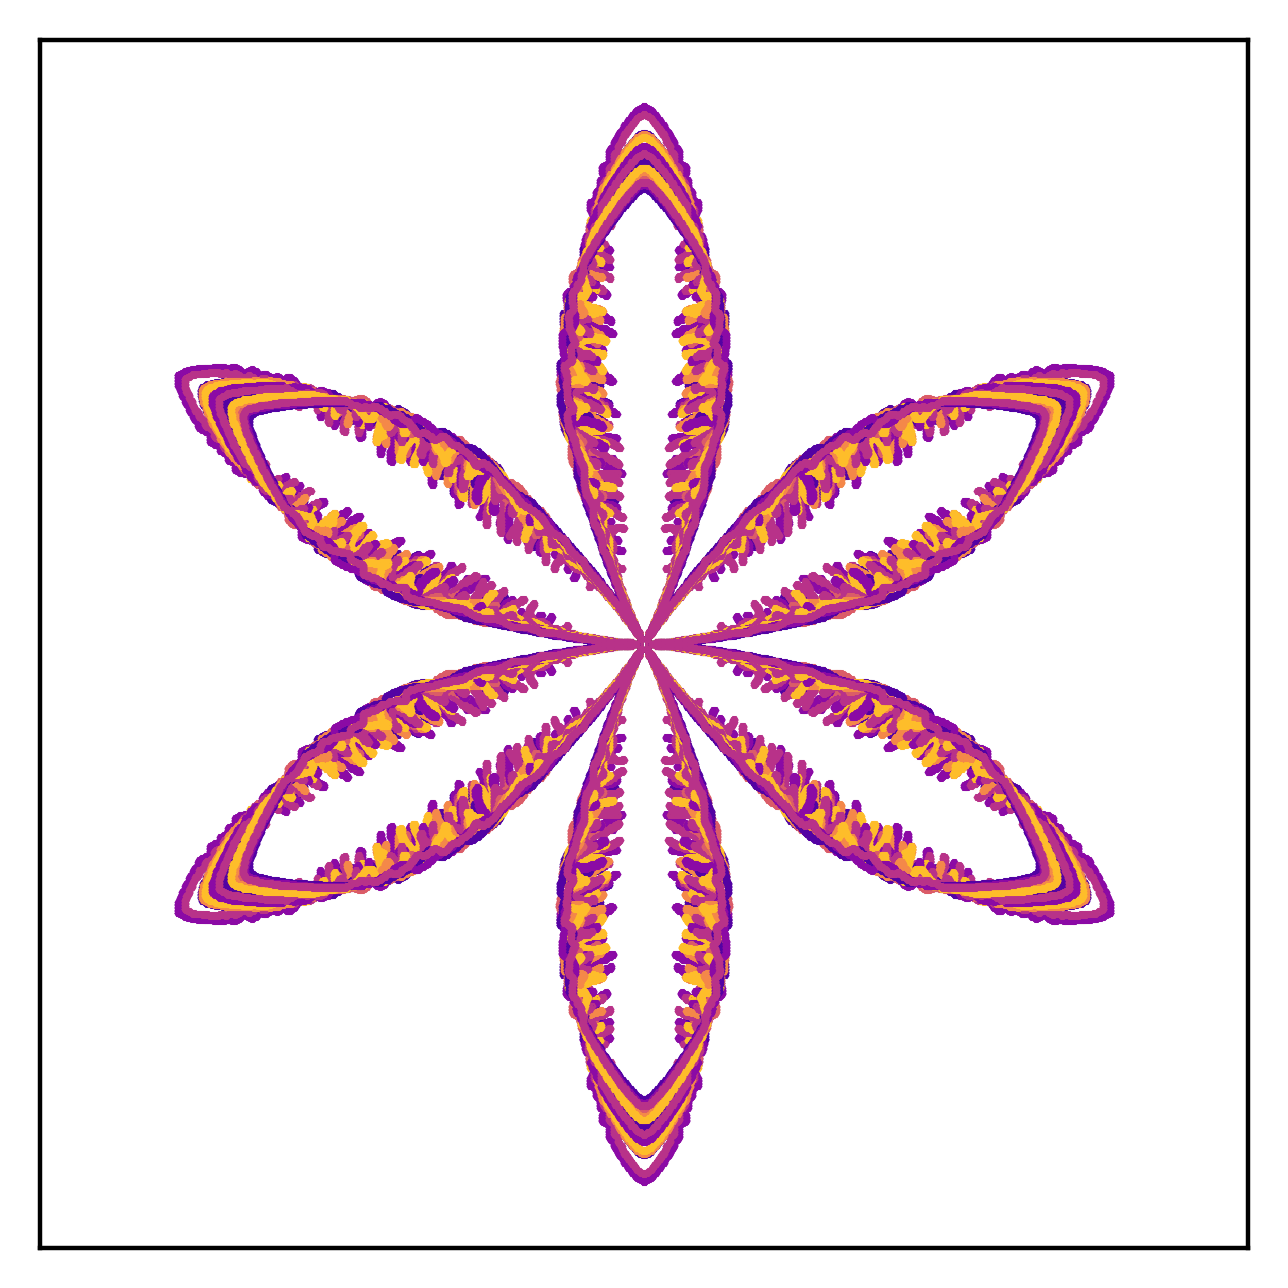

In [8]:
f_name = "exemple_raw_dendrites"
dendrite_specs = pd.read_csv(f"{f_name}/specs.csv")

# Length of simulation zone
L = 551 

# Géométrie du graphique
demi_largeur = 400

# Initialize instances of useful classes
dendrite_gu = icef.GeneralUtilities(L) # init GeneralUtilities instance
converter = snp.CoordsFromIceMap(L) # init CoordsFromIceMap instance

plt.figure()

# Bang out a silhouette for every graph
for i in dendrite_specs["Simulation number"]:

    # Gets boolean ice map. Hacky fix, bite me
    ice_map = np.genfromtxt(f"{f_name}/{i}", dtype=np.int8).astype("bool") 

    # Get boundary_cells
    dendrite_boundary_map = dendrite_gu.construct_boundary_map(ice_map)
    _, boundary_cells = dendrite_gu.distinguish_cells(ice_map, dendrite_boundary_map)
    
    # Get number of boundary cells in 1/12th zone
    boundary_cell_amount = np.shape(boundary_cells)[0] 

    # append coordinates of these cells to the coordinate array R
    R = np.empty((2*boundary_cell_amount,2))
    
    for i in range(boundary_cell_amount):
        # get coords from position in array
        coords = converter.coords_from_array_position(boundary_cells[i,0], boundary_cells[i,1])
        # x coords
        R[i,0] = coords[0]
        R[i+boundary_cell_amount,0] = -coords[0] # mirror

        R[i,1] = coords[1]
        R[i+boundary_cell_amount,1] = coords[1] # same as prev y

    # rotate around vectors to get full snowflake
    R = converter.reconstruct_all_coordinates(R)

    plt.plot(R[:,0], R[:,1], marker="H", linewidth=0, markersize=124/demi_largeur)

plt.xlim(-demi_largeur, demi_largeur)
plt.ylim(-demi_largeur, demi_largeur)

plt.xticks([])
plt.yticks([])

plt.gca().set_aspect(1)

plt.show()

# PLATES (*Zyzz music starts*)

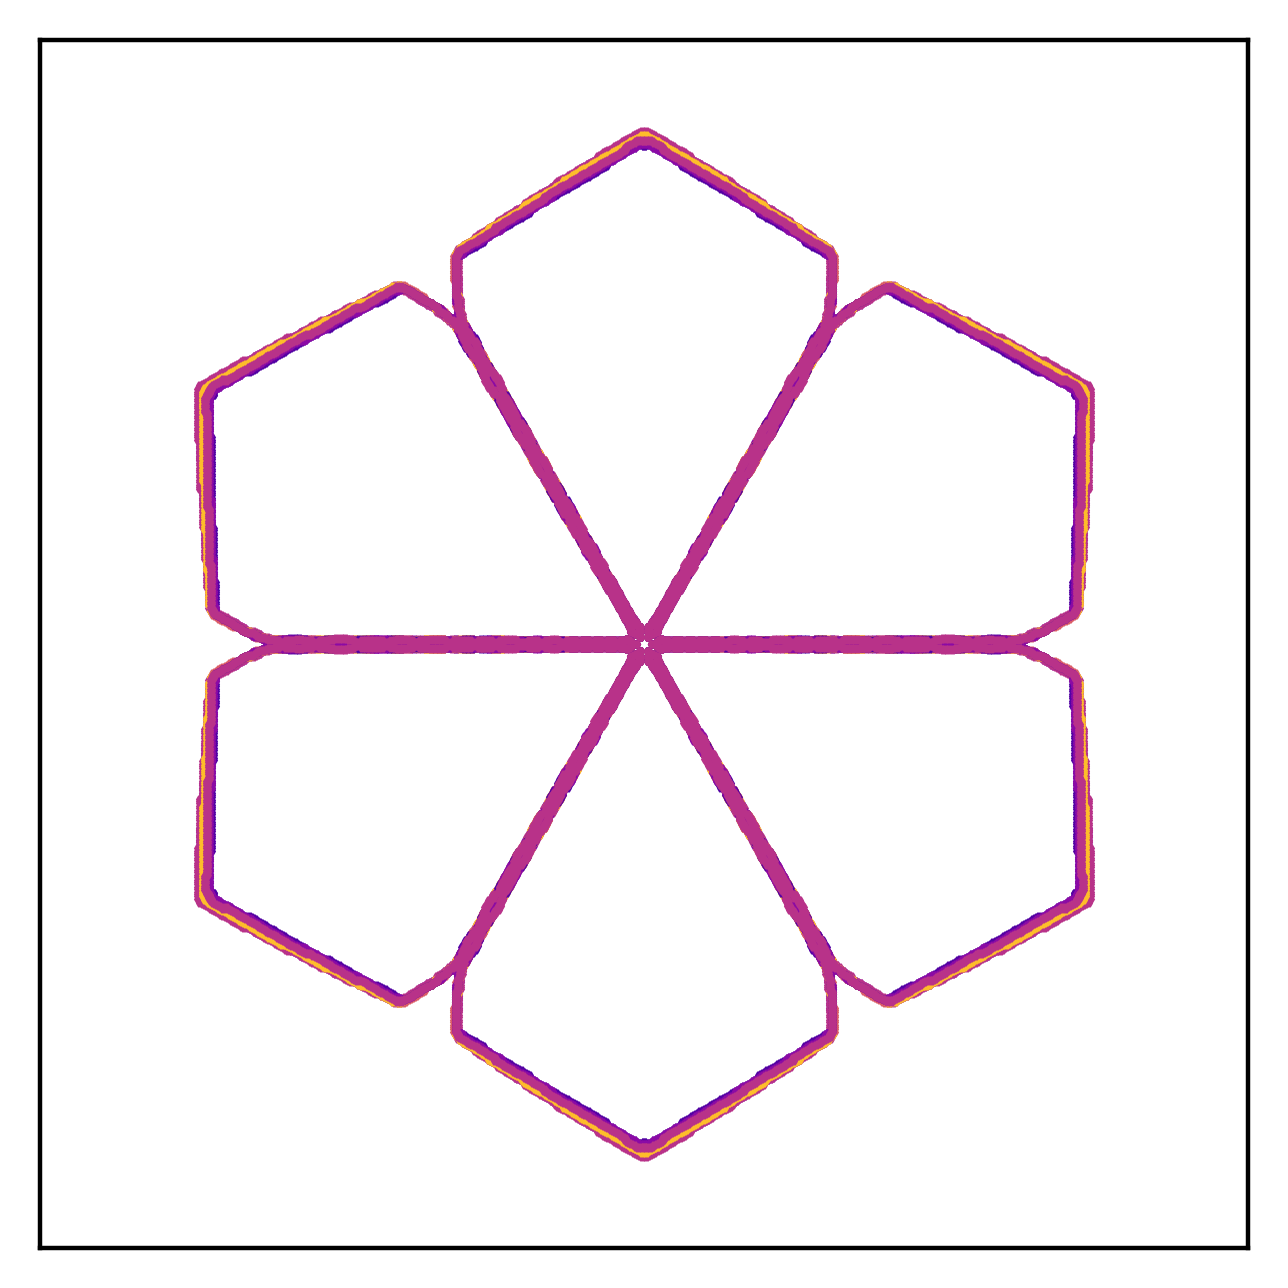

In [9]:
f_name = "exemple_raw_plates"
plate_specs = pd.read_csv(f"{f_name}/specs.csv")

L = 551 # Length of simulation zone
demi_largeur = 250

plate_gu = icef.GeneralUtilities(L)

plt.figure()

for i in plate_specs["Simulation number"]:

    ice_map = np.genfromtxt(f"{f_name}/{i}", dtype=np.int8).astype("bool") # hacky fix, bite me

    converter = snp.CoordsFromIceMap(L) # initialize coordinate converter object

    plate_boundary_map = plate_gu.construct_boundary_map(ice_map)
    _, boundary_cells = plate_gu.distinguish_cells(ice_map, plate_boundary_map)
    
    # Get number of boundary cells in 1/12th zone
    boundary_cell_amount = np.shape(boundary_cells)[0] 

    # append coordinates of these cells to the coordinate array R
    R = np.empty((2*boundary_cell_amount,2))
    
    for i in range(boundary_cell_amount):
        # get coords from position in array
        coords = converter.coords_from_array_position(boundary_cells[i,0], boundary_cells[i,1])
        # x coords
        R[i,0] = coords[0]
        R[i+boundary_cell_amount,0] = -coords[0] # mirror

        R[i,1] = coords[1]
        R[i+boundary_cell_amount,1] = coords[1] # same as prev y

    # rotate around vectors to get full snowflake
    R = converter.reconstruct_all_coordinates(R)

    plt.plot(R[:,0], R[:,1], marker="H", linewidth=0, markersize=124/demi_largeur)

plt.xlim(-demi_largeur, demi_largeur)
plt.ylim(-demi_largeur, demi_largeur)
plt.gca().set_aspect(1)

plt.xticks([])
plt.yticks([])

plt.show()

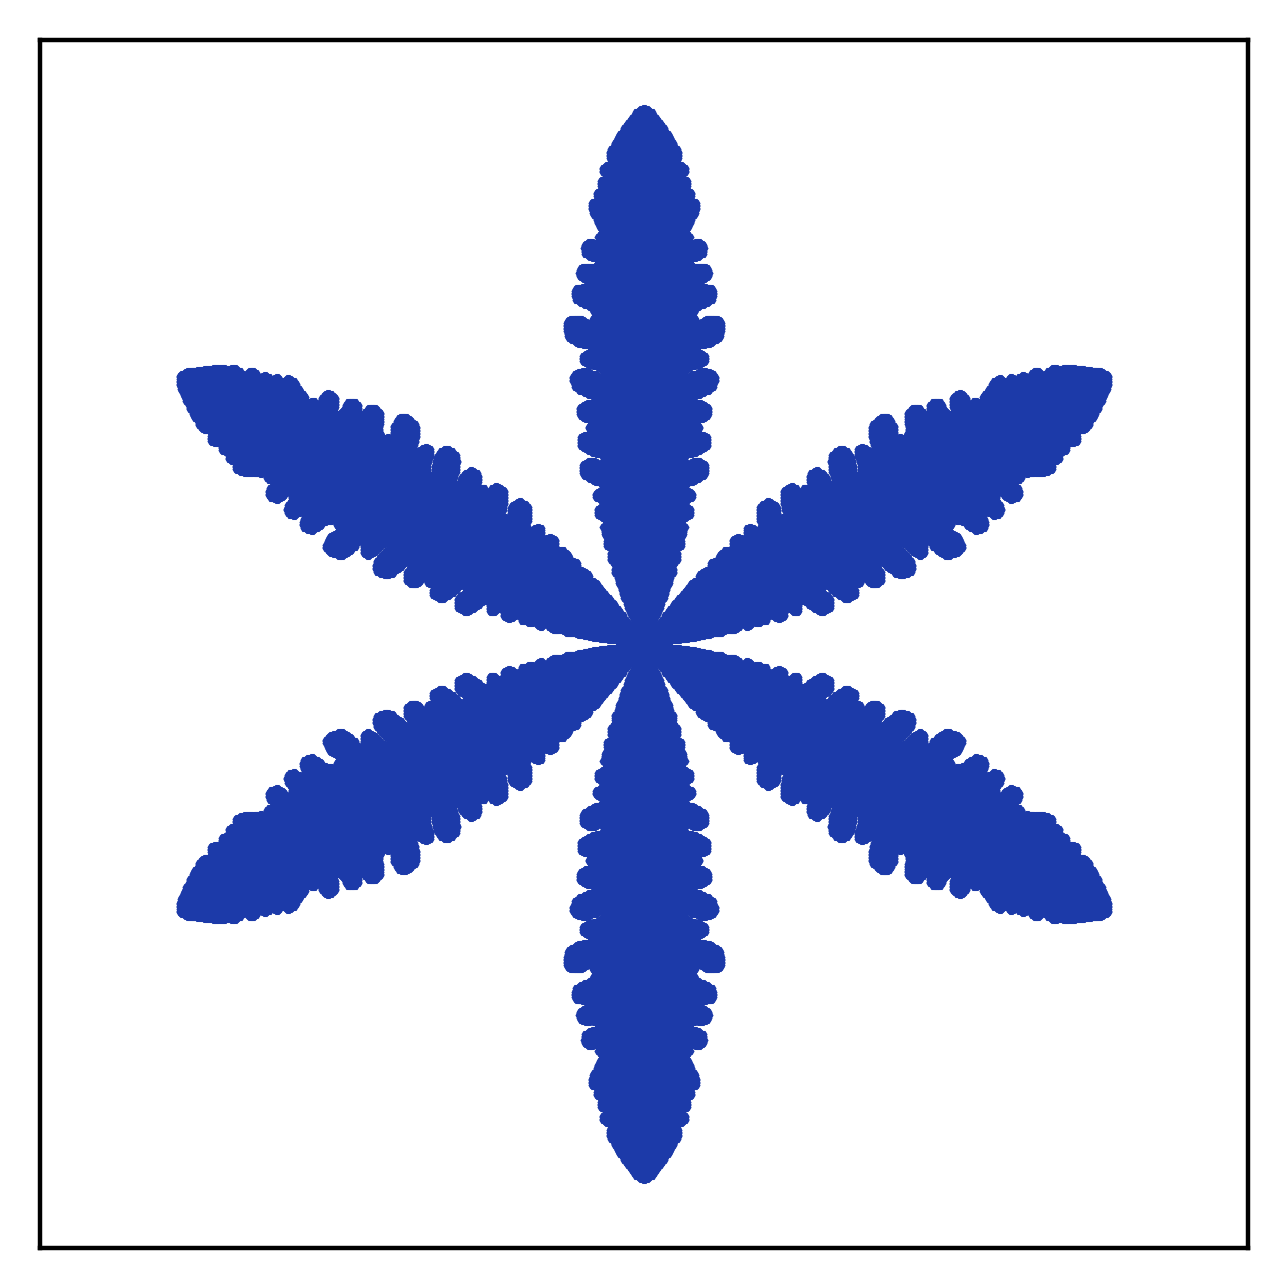

In [10]:
f_name = "exemple_raw_dendrites"

L = 551 # Length of simulation zone
demi_largeur = 400

ice_map = np.genfromtxt(f"{f_name}/2", dtype=np.int8).astype("bool") # hacky fix, bite me

converter = snp.CoordsFromIceMap(L)
R = converter.convert_ice_map_to_all_coords(ice_map)

plt.figure()

plt.plot(R[:,0], R[:,1], marker="H", linewidth=0, markersize=124/demi_largeur, color="#1c3aa9")

plt.xlim(-demi_largeur, demi_largeur)
plt.ylim(-demi_largeur, demi_largeur)
plt.gca().set_aspect(1)

plt.xticks([])
plt.yticks([])

plt.show()

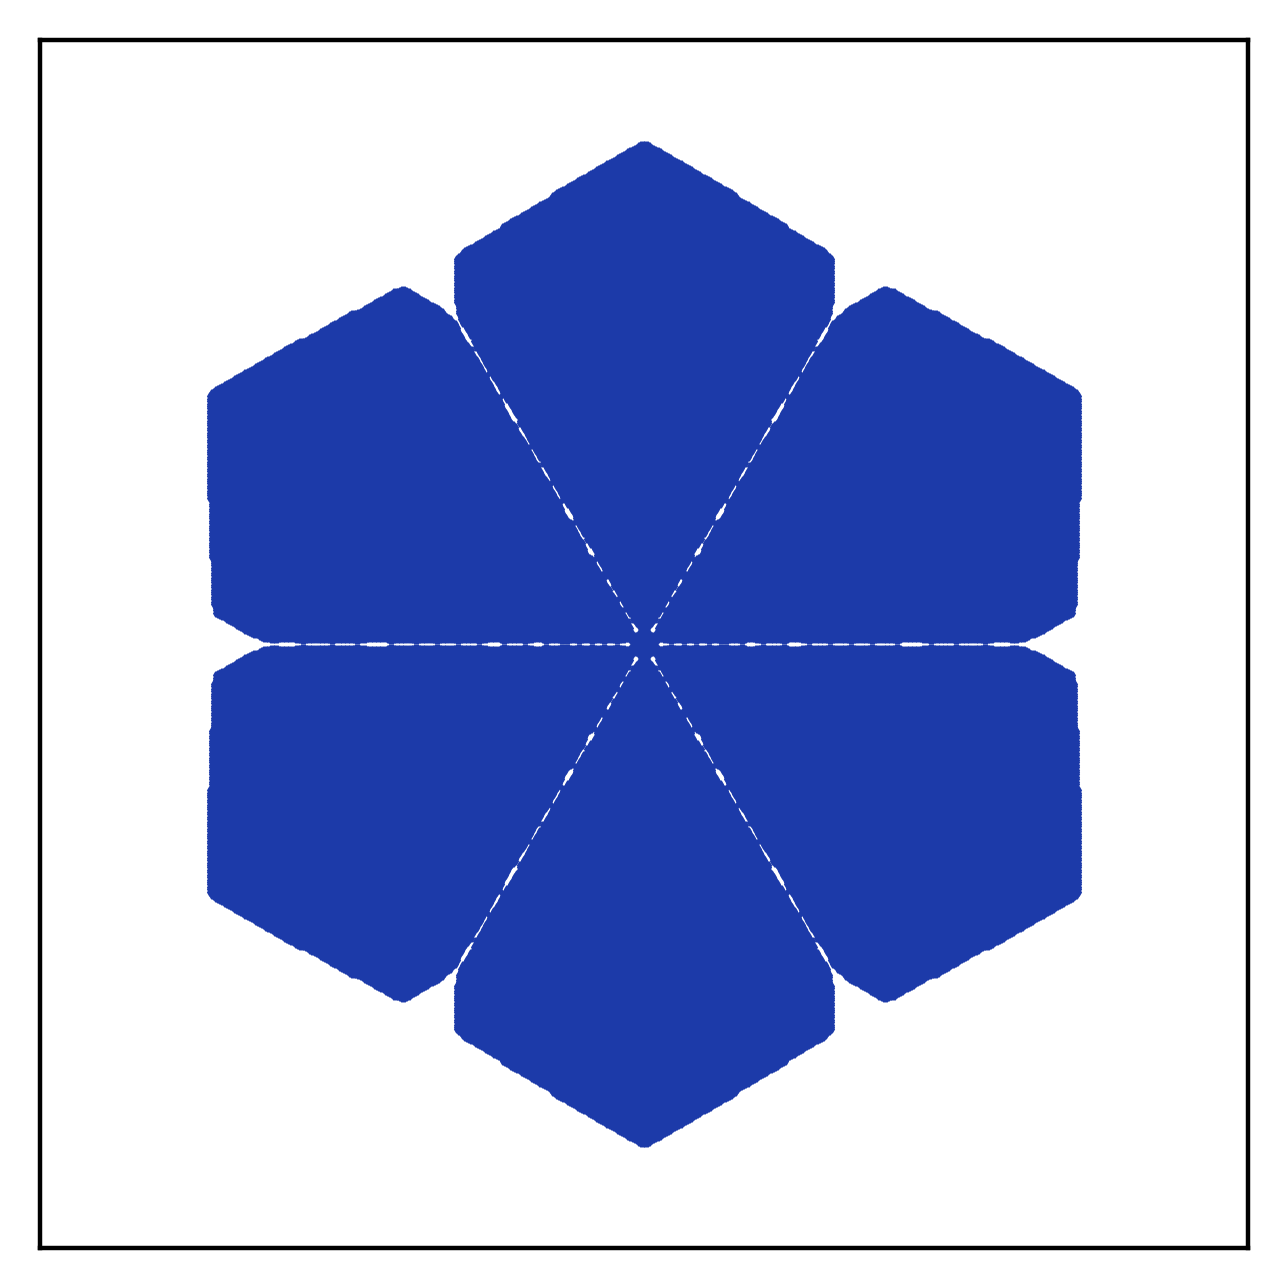

In [11]:
f_name = "exemple_raw_plates"

L = 551 # Length of simulation zone
demi_largeur = 250

ice_map = np.genfromtxt(f"{f_name}/8", dtype=np.int8).astype("bool") # hacky fix, bite me

converter = snp.CoordsFromIceMap(L)
R = converter.convert_ice_map_to_all_coords(ice_map)

plt.figure()

plt.plot(R[:,0], R[:,1], marker="H", linewidth=0, markersize=124/demi_largeur, color="#1c3aa9")

plt.xlim(-demi_largeur, demi_largeur)
plt.ylim(-demi_largeur, demi_largeur)
plt.gca().set_aspect(1)

plt.xticks([])
plt.yticks([])

plt.show()

# Sweep

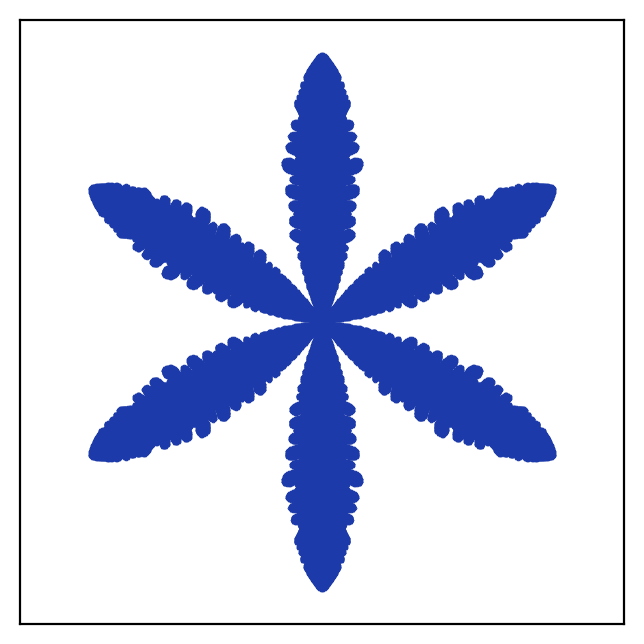

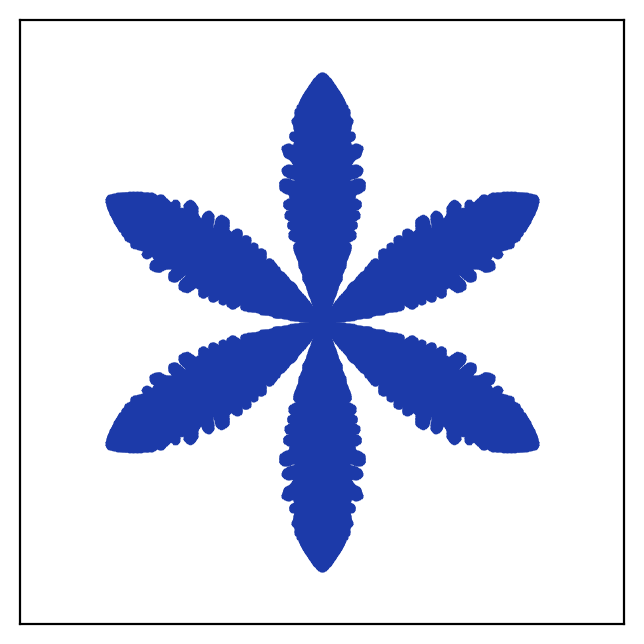

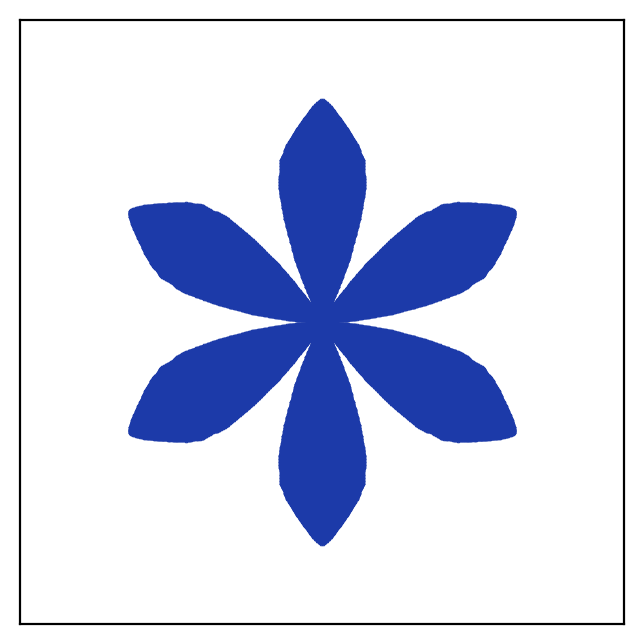

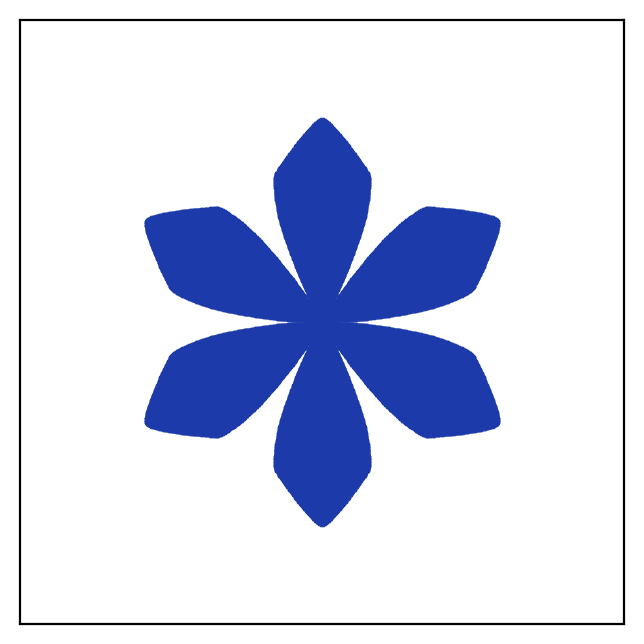

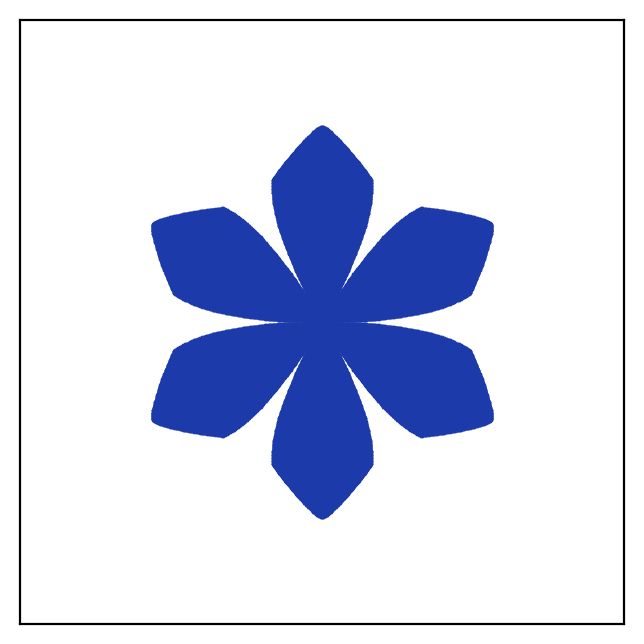

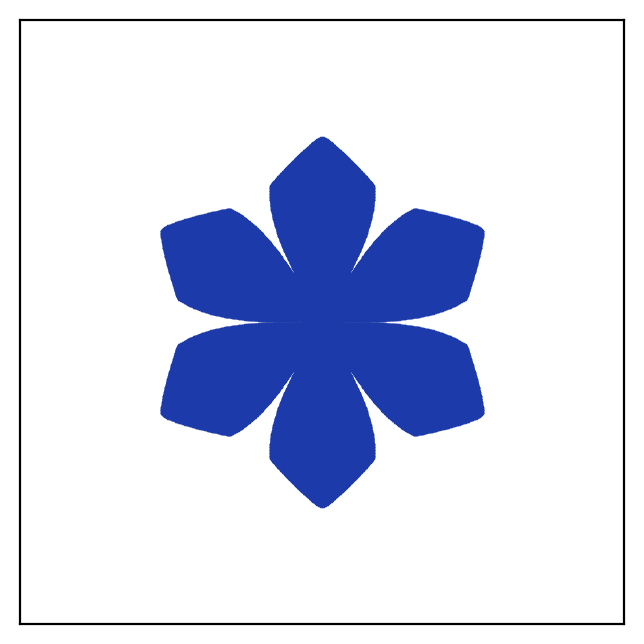

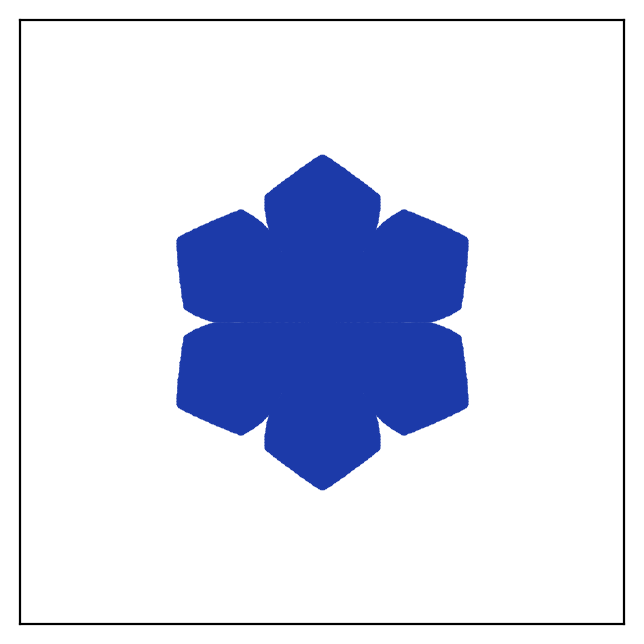

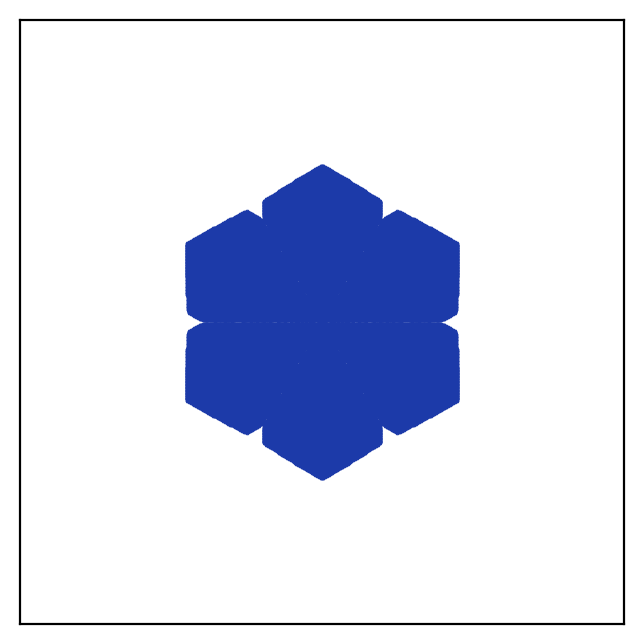

In [12]:
plt.rcParams.update({"figure.dpi" : 200})

f_name = "exemple_raw_sweep"
sweep_specs = pd.read_csv(f"{f_name}/specs.csv")

L = 551 # Length of simulation zone
demi_largeur = 400

for i in sweep_specs["Simulation number"]:

    ice_map = np.genfromtxt(f"{f_name}/{i}", dtype=np.int8).astype("bool") # hacky fix, bite me

    converter = snp.CoordsFromIceMap(L)
    R = converter.convert_ice_map_to_all_coords(ice_map)

    plt.figure()

    plt.plot(R[:,0], R[:,1], marker="H", linewidth=0, markersize=124/demi_largeur, color="#1c3aa9")

    plt.xlim(-demi_largeur, demi_largeur)
    plt.ylim(-demi_largeur, demi_largeur)
    plt.gca().set_aspect(1)

    plt.xticks([])
    plt.yticks([])

    plt.show()